In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("smoke_detection_iot.csv")
stats = df.describe().T
q1 = df.quantile(0.25)
q2 = df.quantile(0.50)
q3 = df.quantile(0.75)

print("=== Statistik Deskriptif ===")
print(stats)
print("\nQ1:\n", q1)
print("\nQ2:\n", q2)
print("\nQ3:\n", q3)

=== Statistik Deskriptif ===
                  count          mean            std           min  \
Unnamed: 0      62630.0  3.131450e+04   18079.868017  0.000000e+00   
UTC             62630.0  1.654792e+09  110002.488078  1.654712e+09   
Temperature[C]  62630.0  1.597042e+01      14.359576 -2.201000e+01   
Humidity[%]     62630.0  4.853950e+01       8.865367  1.074000e+01   
TVOC[ppb]       62630.0  1.942058e+03    7811.589055  0.000000e+00   
eCO2[ppm]       62630.0  6.700210e+02    1905.885439  4.000000e+02   
Raw H2          62630.0  1.294245e+04     272.464305  1.066800e+04   
Raw Ethanol     62630.0  1.975426e+04     609.513156  1.531700e+04   
Pressure[hPa]   62630.0  9.386276e+02       1.331344  9.308520e+02   
PM1.0           62630.0  1.005943e+02     922.524245  0.000000e+00   
PM2.5           62630.0  1.844678e+02    1976.305615  0.000000e+00   
NC0.5           62630.0  4.914636e+02    4265.661251  0.000000e+00   
NC1.0           62630.0  2.035865e+02    2214.738556  0.00000

In [4]:
print("\n=== 10 Record Pertama (Numerik) ===")
print(df.select_dtypes(include=["float64", "int64"]).head(10))


=== 10 Record Pertama (Numerik) ===
   Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   
5           5  1654733336          20.073        54.12          0        400   
6           6  1654733337          20.088        53.61          0        400   
7           7  1654733338          20.103        53.20          0        400   
8           8  1654733339          20.117        52.81          0        400   
9           9  1654733340          20.132        52.46          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0

In [5]:
num_records = df.shape[0]
num_attributes = df.shape[1]
attributes = df.columns.tolist()
num_numeric = len(df.select_dtypes(include=["float64", "int64"]).columns)

print("\n=== Informasi Dataset ===")
print("Jumlah record:", num_records)
print("Jumlah attribute:", num_attributes)
print("Nama attribute:", attributes)
print("Jumlah attribute numerik:", num_numeric)


=== Informasi Dataset ===
Jumlah record: 62630
Jumlah attribute: 16
Nama attribute: ['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm']
Jumlah attribute numerik: 16


In [6]:
print("\n=== Jumlah Label untuk Attribute Object ===")
for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


=== Jumlah Label untuk Attribute Object ===


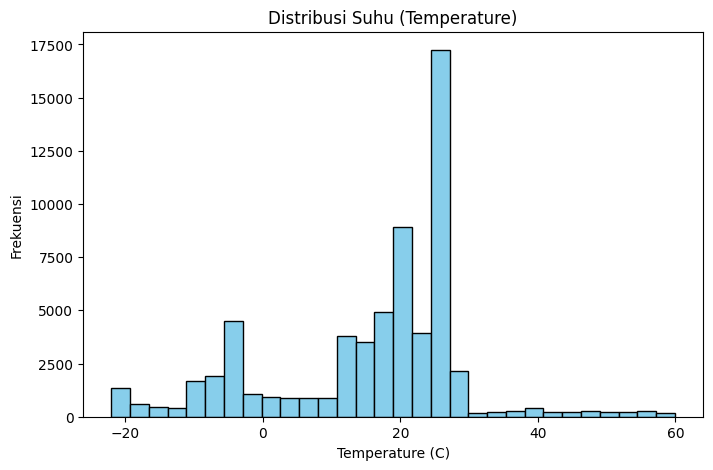

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df["Temperature[C]"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribusi Suhu (Temperature)")
plt.xlabel("Temperature (C)")
plt.ylabel("Frekuensi")
plt.show()


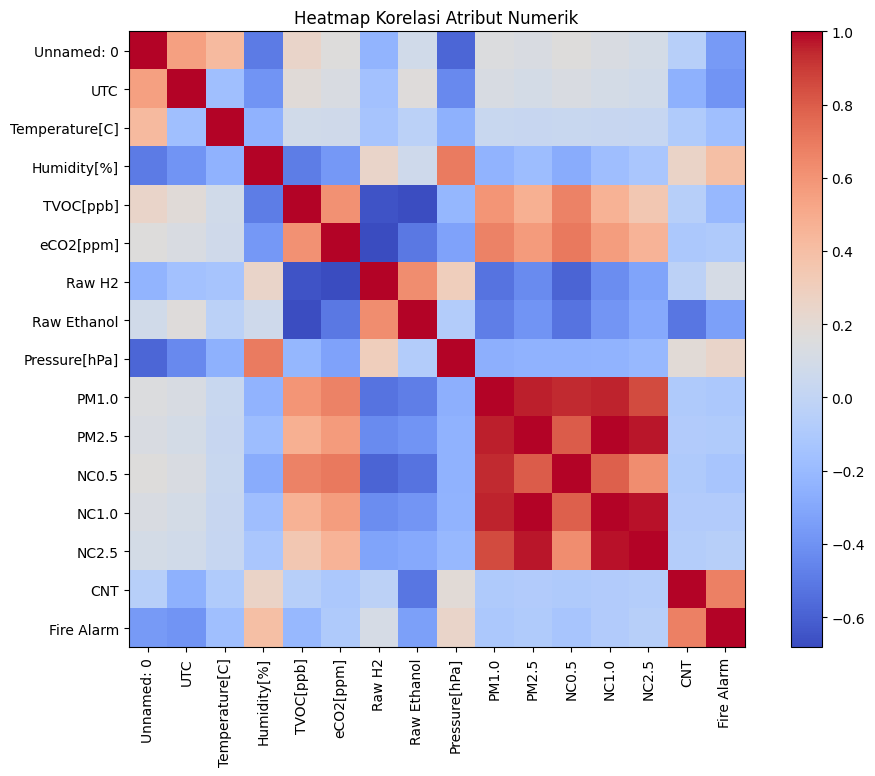

In [8]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

## Kesimpulan Analisis Dataset Smoke Detection IoT

Dari hasil analisis dan visualisasi data:

1. Dataset punya banyak record dengan atribut berupa data sensor seperti suhu, kelembaban, dan lain-lain.
2. Statistik deskriptif menunjukkan setiap sensor punya rata-rata, minimum, maksimum, dan sebaran (Q1, Q2, Q3) yang berbeda. Misalnya suhu memiliki nilai rata-rata tertentu dengan variasi yang cukup besar.
3. Ada atribut kategorikal (misalnya status deteksi asap) yang punya beberapa label, sehingga bisa dipakai untuk klasifikasi.
4. Visualisasi histogram menunjukkan pola penyebaran suhu sensor, jadi bisa kelihatan apakah ada nilai-nilai ekstrem atau mayoritas data berada di rentang tertentu.
5. Heatmap korelasi memperlihatkan bahwa beberapa sensor saling berhubungan (misalnya suhu dan kelembaban), sementara ada juga sensor yang tidak terlalu berkaitan.

Secara umum, dataset ini bisa dipakai untuk membangun model pendeteksi asap berbasis sensor IoT, karena datanya cukup lengkap dan memiliki perbedaan nilai antar kondisi.
